170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step
80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.4086 - loss: 1.6639 - val_accuracy: 0.5376 - val_loss: 1.3146
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.5270 - loss: 1.3385 - val_accuracy: 0.5475 - val_loss: 1.2802
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.5538 - loss: 1.2706 - val_accuracy: 0.5640 - val_loss: 1.2285
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.5659 - loss: 1.2367 - val_accuracy: 0.5782 - val_loss: 1.2002
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.5761 - loss: 1.2062 - val_accuracy: 0.5848 - val_loss: 1.1798
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.5798 - loss: 1.1966 - val_accuracy: 0.5879 - val_loss: 1.1663
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.5949 - loss: 1.1556 - val_accuracy: 0.5802 - va

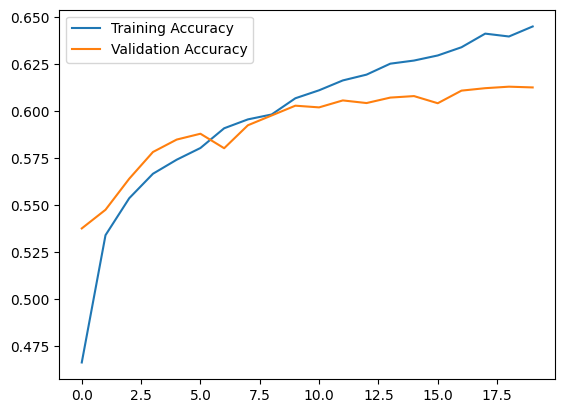

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Step 2: Understand and Prepare the Data
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Data Normalization
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-Hot Encoding of Labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Step 3: Model Using Transfer Learning
# Load Pre-trained VGG19 Model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add Custom Layers
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the Base Model Layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 4: Train the Model
# Train the Model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

# Fine-Tuning (Optional)
for layer in base_model.layers[-4:]:
    layer.trainable = True

model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
history_fine = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Step 5: Evaluate Performance
# Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Metrics Visualization
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()